# Stability Analysis in Control Systems

Today, we embark on an exploration of the stability problem, a pivotal and essential aspect in the realm of control system design. Adjustments in controller parameters, fundamental to any design process, must invariably adhere to the domain of stability. Fulfilling stability conditions is not just a requirement, but a cornerstone of successful system design. To grasp this complex topic, we will first tap into our intuitive understanding of stability. This foundational knowledge will then serve as a springboard for delving into more quantitative and analytical methods. Let's embark on this journey to demystify the principles of stability in control systems.

### Understanding a Linear System

Consider a linear system, which for our purposes can be any physical system. This system is influenced by its environment, which includes:

- Command signal or reference input, as per your demand (denoted as $ r $)
- Disturbance (denoted as $ w $)
- Output (denoted as $ y $), the variable of interest

<table> 
<tr>
    <img src="./pics/16_stability.png?1" alt="16_stability" style="width:650px;"/>
</tr></table>


In control system analysis and design, these three variables are frequently encountered in block diagrams.

However, the output alone doesn't describe the dynamical state of the system completely. The dynamical state is fully described by all the state variables, typically denoted as $ x_1, x_2, \ldots, x_n $.

#### System Model and Its Limitations

When a system is characterized by a transfer function $ G(s) $, where $ \frac{Y(s)}{R(s)} = G(s) $, achieving a desired output $ Y $ in response to an input $ R(s) $ does not automatically imply that the actual system will mirror this response. This discrepancy arises because certain state variables, which are not reflected in the output $ Y $, might exhibit instability when stimulated by the input or disturbances. These variables may fail to settle into a steady state.

Consequently, even if the model forecasts a suitable output $ Y $, the real-world system might deviate from these predictions due to unstable states. This underscores the critical importance of conducting a thorough stability analysis prior to simulations or practical experiments. It is crucial that all state variables stabilize at a steady state to affirm the overall stability of the system.

In scenarios where the primary focus is on the output, one might not prioritize controlling the transient dynamics of the state variables. However, it is vital to ensure their stability — that is, their convergence to a steady state. Thus, while the transient behavior of $ Y $ may be the main concern, verifying the stability of the state variables is a non-negotiable aspect of the system's analysis.

In the rest of the notebook, we will focus on studying $G(s)$, and hence we will focus on the transient behaviour of $Y$. This assumes that the system is stable, i.e., all the state variables will always converge to a steady state.

### Understanding the Role of Disturbances ($w$) and Initial Conditions ($x_0$)

Change in disturbance $ w $ effectively changes the initial conditions of the system, thus altering the energy storage. By varying the initial conditions across the state space and observing the stability of $ x_1, x_2, \ldots, x_n $, we can assess the system's stability.

1. **Influence of Disturbances ($w$):** 
   - In real-world scenarios, disturbances ($w$) are often unpredictable both in their occurrence and magnitude. 
   - These disturbances impact the energy storage within the system. This effect is akin to altering the system's initial conditions ($x_0$). 
   - The initial conditions at time $t = 0$ serve as indicators of the system's energy state at that moment.

2. **Initial Conditions and System Response:**
   - The system's response to inputs ($r$) or disturbances ($w$) is equivalent to a change in its initial energy state.
   - Modifying the initial conditions ($x_0$) and observing the system's response allows us to understand how disturbances might affect the system's stability.
   - By varying the initial conditions ($x_0$) across a wide range in the state space, we can simulate how the system might behave under different scenarios.
   - This process involves examining the stability of the state variables ($x_1, x_2, ..., x_n$) under these varied conditions.
   - If the state variables remain stable (i.e., they do not diverge) across this range of initial conditions, we can be confident in the system's overall stability.


In summary, the concept of stability in control systems is not just about observing the system's output but involves a comprehensive analysis of how the state variables react to changes in initial conditions and external disturbances. By thoroughly examining the stability of these variables, we can predict and ensure the reliable performance of the system in real-world conditions.

### Stability Analysis Methodology

- **Bounded-Input Bounded-Output (BIBO) Stability**: This concept ensures that if the input $ r $ is bounded, the output $ y $ will also be bounded. 

- **Zero-Input Stability**: This aspect focuses on the system's behavior in the absence of an external input, relying only on the initial conditions and disturbances.

It's crucial to operate within the linear range of the system for these stability concepts to be valid. In non-linear ranges, the stability analysis becomes more complex and is beyond the scope of our current discussion.

-----

### SIDEBAR - Some examples

Let's understand this more with some examples.

We'll consider is a second-order system, which is common in control engineering.

In the example below, `m` is the mass, `c` is the damping coefficient, and `k` is the spring constant. The system's stability depends on these parameters. For instance, a low damping coefficient (e.g., `c = 0.5`) with a certain mass and spring constant might show an underdamped response (stable), while a negative damping coefficient (e.g., `c = -0.5`) could make the system unstable.

You can experiment with different values of `m`, `c`, and `k` to demonstrate stability and instability. The initial displacement and velocity (initial_displacement and initial_velocity) can also be varied to show how the system reacts from different initial states.

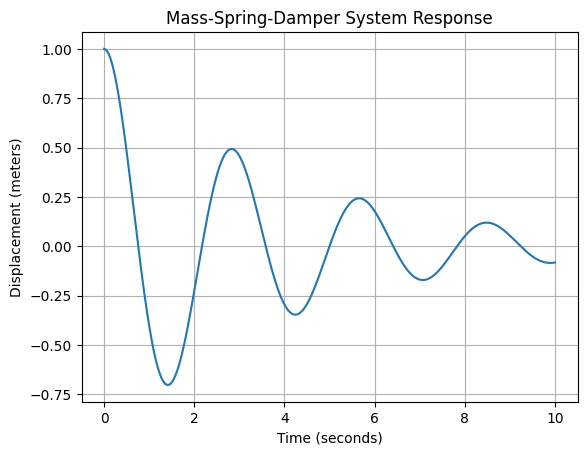

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

def simulate_mass_spring_damper(m, c, k, initial_displacement, initial_velocity):
    """
    Simulates the mass-spring-damper system and plots its response.

    Parameters:
    m (float): Mass
    c (float): Damping coefficient
    k (float): Spring constant
    initial_displacement (float): Initial displacement
    initial_velocity (float): Initial velocity
    """

    # System matrices
    A = [[0, 1], [-k/m, -c/m]]
    B = [[0], [1/m]]
    C = [1, 0]
    D = [0]

    # Create the state-space model
    sys = ctl.StateSpace(A, B, C, D)

    # Time array
    t = np.linspace(0, 10, 1000)

    # Initial state [displacement, velocity]
    X0 = [initial_displacement, initial_velocity]

    # Simulate the system
    t, y = ctl.initial_response(sys, T=t, X0=X0)

    # Plot the response
    plt.figure()
    plt.plot(t, y)
    plt.title('Mass-Spring-Damper System Response')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Displacement (meters)')
    plt.grid(True)
    plt.show()

# Example usage
simulate_mass_spring_damper(m=1.0, c=0.5, k=5.0, initial_displacement=1.0, initial_velocity=0.0)


<IPython.core.display.Javascript object>


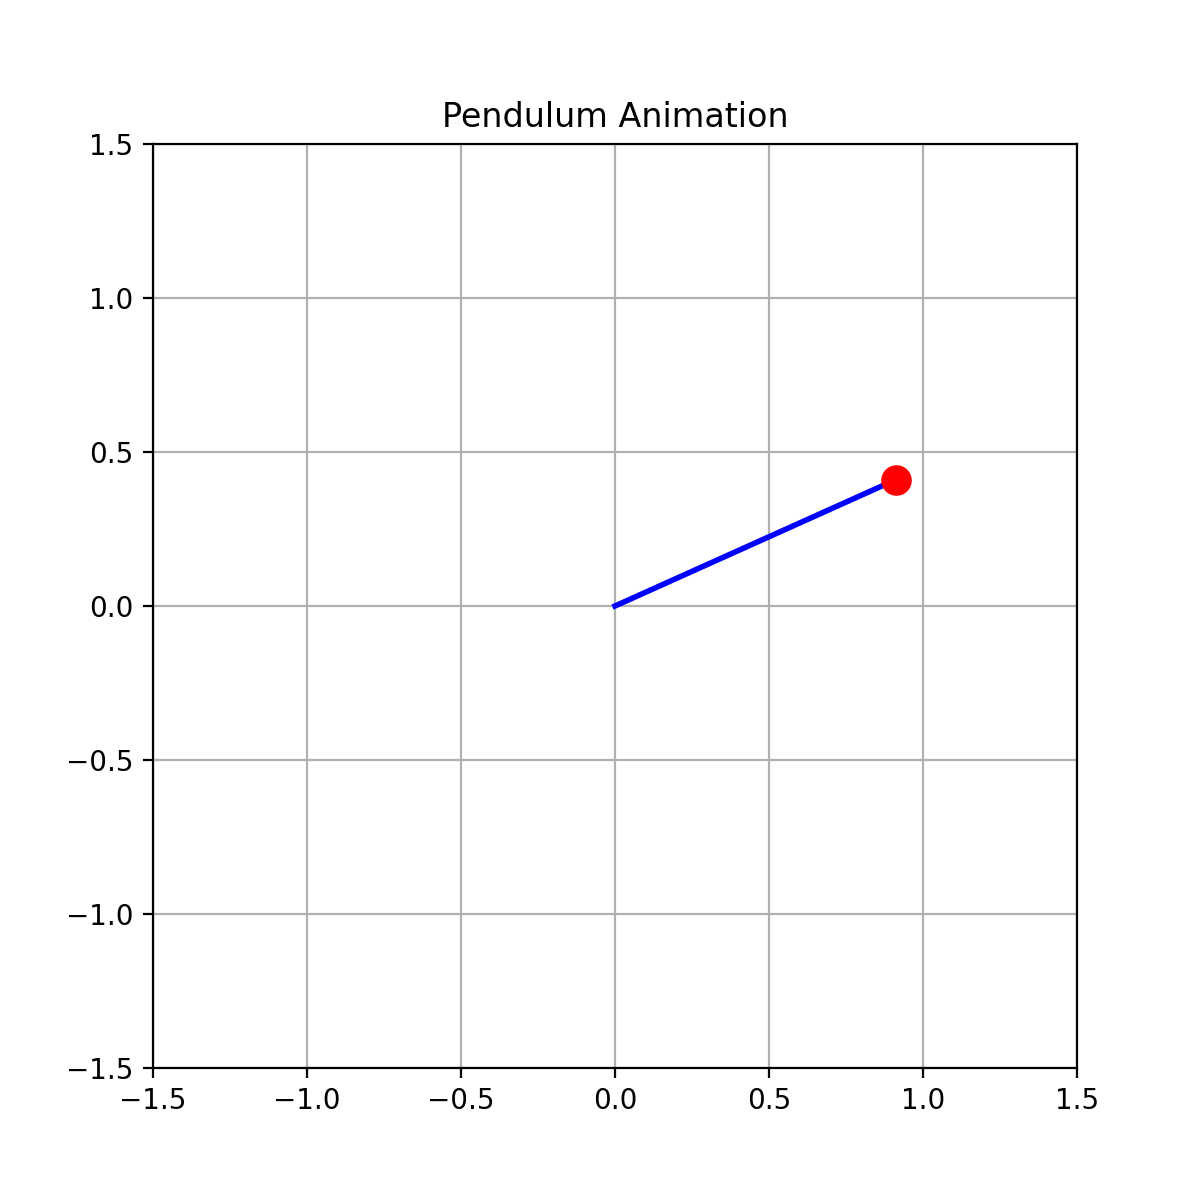

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import control as ctl
from IPython.display import HTML

def draw_pendulum(ax, l, angle, is_upright):
    """
    Draws the pendulum on the given axes.

    Parameters:
    ax (matplotlib.axes.Axes): The axes to draw on.
    l (float): Length of the pendulum
    angle (float): Angle of the pendulum (in radians)
    is_upright (bool): Indicates if the pendulum is in the upright position
    """
    # Convert angle to Cartesian coordinates
    x = l * np.sin(angle)
    y = l * np.cos(angle) if is_upright else -l * np.cos(angle)

    # Clear previous drawing and draw the pendulum
    ax.clear()
    ax.plot([0, x], [0, y], color='blue', lw=2)
    ax.plot(x, y, 'o', color='red', markersize=10)

    # Set appropriate limits for both scenarios
    if is_upright:
        ax.set_ylim(-1.5*l, 1.5*l)
    else:
        ax.set_ylim(-1.5*l, 0)

    ax.set_xlim(-1.5*l, 1.5*l)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.set_title('Pendulum Animation')


def simulate_pendulum(g, l, initial_angle, is_upright):
    """
    Simulates a pendulum system and creates an animation of its response.

    Parameters:
    g (float): Acceleration due to gravity
    l (float): Length of the pendulum
    initial_angle (float): Initial angle (in radians)
    is_upright (bool): True for simulating the upright position, False for the downward position
    """
    # Pendulum parameters
    A = [[0, 1], [g/l if is_upright else -g/l, 0]]
    B = [[0], [1/l]]
    C = [1, 0]
    D = [0]

    # Create the state-space model
    sys = ctl.StateSpace(A, B, C, D)

    # Time array for simulation
    t = np.linspace(0, 1, 10)

    # Initial state [angle, angular velocity]
    X0 = [initial_angle, 0]

    # Simulate the system
    t, y = ctl.initial_response(sys, T=t, X0=X0)

    # Create figure and axes for the animation
    fig, ax = plt.subplots(figsize=(6, 6))

    # Function to update the animation
    def update(frame):
        draw_pendulum(ax, l, y[frame], is_upright)

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(t), interval=10, repeat=False)  # Adjusted interval
#     plt.show()
    return ani

# Example usage
ani = simulate_pendulum(g=9.81, l=1.0, initial_angle=0.1, is_upright=True)  # Unstable (Upright)

# Display the animation
HTML(ani.to_jshtml())


--- END OF SIDEBAR

## BIBO Stability

BIBO stability is a critical concept in the study of control systems, especially for linear time-invariant systems. In BIBO stability, we consider a system that is initially relaxed, which means that at time $ t = 0 $, all state variables $ x $ are at zero, and the system has no initial energy stored. This scenario provides a reference point for analyzing how the system responds to external inputs.

Note that $t=0$ is a reference time, for Linear Time Invariant (LTI) systems is your initial time. The stability analysis for time variant and/or non-linear systems is more complex and beyond the scope of this course.

This assumption simplifies the stability analysis as we can focus on the transfer function model to analyze stability. For a relaxed system, the initial energy is zero and this means that all state variables are not excited and we can safely neglect them. Since all initial conditions are zeros we can study the stability only in terms of its trasnfer function.

The key principle here is that if the external input $ r $ is bounded, then the output $ y $ should also remain bounded.


#### Quantitative Analysis of BIBO Stability

The quantitative method to establish BIBO stability involves ensuring that the output $ y $ remains bounded for any bounded input $ r $. This principle applies regardless of the nature of the input, whether it's a desired command input or a disturbance from the environment. The boundedness of the output is a fundamental requirement for a control system to be considered stable under BIBO criteria.


- In BIBO stability, we focus on the response of the system to external inputs (command and disturbance) while assuming zero initial energy.
- The stability can be analyzed using the transfer function model, as a relaxed system can be fully described by this model.
- The aim is to ensure that for any bounded input $ r $, the output $ y $ remains bounded.

#### Example for BIBO Stability
- Consider a system with a step input. If the step input is bounded, the output response of the system should also exhibit bounded behavior, not growing indefinitely.


## Zero-Input Stability

The second aspect of our stability study is zero-input stability, where the external input is assumed to be zero. 

However, the initial state $ x_0 $ can change due to external inputs, affecting the energy storage in the system. 

The mathematical model for zero-input stability is represented by:

$$
\dot{x} = Ax
$$

where $ x(t = 0) = x_0 $. The focus here is on whether the system state $ x(t) $ remains bounded for all $ t \geq 0 $ when varying $ x_0 $. If so, the system preserves zero-input stability.


#### Summary

- Zero-input stability considers the system's response when external inputs are assumed to be zero.
- The focus is on how variations in the initial state $ x_0 $ affect the system's state $ x(t) $ over time.
- The goal is to ensure that the system's states remain bounded for all time $ t \geq 0 $ under zero external input.

We call a time-invariant system where the input is zero, an autonomous system. This concept is crucial for studying zero-input stability.

**Pop-up Question:** Why is zero-input stability important, and how does it differ from BIBO stability?

**Answer**: Zero-input stability focuses on the system's behavior in the absence of external inputs, emphasizing the system's response based on its initial state. It differs from BIBO stability, which deals with the system's response to external bounded inputs, ensuring the output remains bounded.


## Combining BIBO and Zero-Input Stability

- For a linear system, if both BIBO and zero-input stability conditions are satisfied, it can be inferred that for any bounded inputs $ r $ and $ w $, the system states and output will remain bounded.


### BIBO Stability and Impulse Response

- The impulse response $ g(t) $ of a system provides a complete characterization of a relaxed system.
The output of the system is given by:

$$
y(t) = \int_{0}^{\infty} g(\tau)r(t-\tau) d\tau
$$

where $r(t)$ is the input.

Since we are interested in BIBO stability, this means we are interested in amplitudes. In this case, the following relationship holds:

$$
|y(t)| = \Big| \int_{0}^{\infty} g(\tau)r(t-\tau) d\tau \Big| \le \int_{0}^{\infty} |g(\tau)| |r(t-\tau)| d\tau
$$


If the input is bounded, i.e., $|r(t-\tau)| \le M$, with $M$ finite,


$$
|y(t)| = \Big| \int_{0}^{\infty} g(\tau)r(t-\tau) d\tau \Big| \le \int_{0}^{\infty} |g(\tau)| |r(t-\tau)| d\tau \le M \int_{0}^{\infty} |g(\tau)| d\tau \le N < \infty
$$


**This means that for BIBO stability, the integral of the modulus of the impulse response should be finite.**

The integral of the modulus of the impulse response of the system characterizes BIBO stability. Specifically, a system is BIBO stable if and only if:

$$
\int_{0}^{\infty} |g(t)| dt < \infty
$$

This condition implies that the area under the absolute value curve of the impulse response must be finite.


#### Poles, Zeros, and Transfer Function Analysis

Now, let's translate our understanding to the poles and zeros requirements, as reflected in the transfer function model of a control system. Consider the transfer function represented as:

$$ \frac{Y(s)}{R(s)} = G(s) = \frac{b_0 s^m + b_1 s^{m-1} + \ldots + b_m}{a_0 s^n + a_1 s^{n-1} + \ldots + a_n} $$

where $ m \leq n $. This inequality ensures that the system is either proper or strictly proper, crucial for realizable systems.


- The characteristic equation, derived from the denominator of the transfer function, is:

$$ \Delta(s) = a_0 s^n + a_1 s^{n-1} + \ldots + a_n = 0 $$


- The roots of this equation, which are the poles of the transfer function, determine the system's stability.


If we take the partial fraction expansion,

- The zeros (roots of the numerator) influence the magnitude and shape of the transient response but do not alter the system's stability.

- The poles dictate the system's stability, and its intrinsic behaviour.

- For example, a first-order factor in the transfer function results in an exponential response (growing or decaying), while a second-order factor leads to an oscillatory response (growing or decaying).


### Analysis in the s-Plane

Let's analyze the s-plane to understand how poles affect system behavior:

- **Left Half-Plane**: Poles in the left half of the s-plane lead to a decaying response, indicating a stable system. Even complex poles in this region result in oscillatory but decaying responses.

- **Right Half-Plane**: Poles in the right half of the s-plane result in a growing response, indicating an unstable system. This holds true for any real, complex, repeated, or distinct poles in this region.

The diagram below shows the impulse response ($R(s)=1$) for possible pole locations:

https://www.youtube.com/watch?v=cJRlUGDtS-0&list=PLA74601484F6994D8&index=24
min 25.55


### Poles and Zeros in Transfer Function Analysis

In analyzing the transfer function of a system, the poles and zeros play a significant role in determining the behaviour of the system. 
- The poles, which are the roots of the characteristic equation of the system, dictate the system's stability.
- In contrast, the zeros influence the transient response but do not affect stability.

#### Scanning the s-Plane for Pole Locations

Examining the s-plane, we analyze the position of the poles to determine stability. If a pole lies in the left half of the s-plane, it contributes to a decaying impulse response, indicating stability. Conversely, poles in the right half or on the imaginary axis can lead to instability.


<table> 
<tr>
    <img src="./pics/16_stability_BIBO_1.png?1" alt="16_stability_BIBO_1" style="width:650px;"/>
</tr></table>


<table> 
<tr>
    <img src="./pics/16_stability_BIBO_2.png?1" alt="16_stability_BIBO_2" style="width:650px;"/>
</tr></table>

#### Marginally Stable Systems

In control systems, the concept of marginal stability emerges when dealing with poles on the imaginary axis, especially simple poles. Let's delve deeper into this scenario and understand its implications:

1. **Mathematics vs. User Perspective**:
   - Mathematically, systems with poles on the imaginary axis are deemed unstable.
   - However, from a practical standpoint, such systems might still be of interest under certain conditions.

2. **Analysis of a Specific Transfer Function**:
   - Consider a transfer function: 
   
     $$
     G(s) = \frac{N(s)}{s(s + j\omega)(s - j\omega)} = \frac{Y(s)}{R(s)} 
     $$
     
   - This system is mathematically unstable, but let's examine it from a user's point of view.

3. **Bounded Response for Specific Inputs**:
   
   - It's observed that for most inputs $ R(s) $, except specific ones that match the poles on the imaginary axis, the system response remains bounded - in this case, the input matches the simple poles and make them double poles.
   - In our specific case above, the critical inputs to avoid are $ R(s) = \frac{1}{s} $ or $ R(s) = \frac{1}{s^2 + \omega^2} $. Except for these, the system exhibits a **non-growing response** (e.g., oscillatory response, constant response, etc).

4. **Acceptance of the System Based on Application**:
   - The decision to accept or reject such a system depends on its application and whether it can handle the specific conditions where the response remains bounded.

5. **Concept of Marginal Stability**:
   - **Marginally stable systems are those where simple poles exist on the imaginary axis**, but the response remains bounded for inputs not matching these poles.
   - This concept implies a cautious approach, where systems are analyzed more thoroughly before being deemed stable or unstable based on their specific use case.
   - It is a boundary condition that mathematics lables as unstable, but from the user perspective might depend on the application.

## Zero-Input Stability and State Variables

Now, let's transition to the concept of zero-input stability, leveraging the knowledge we have of state variables:

1. **The Linear Autonomous System**:
   - Consider a linear autonomous system:
     $$ \dot{x} = Ax $$
     $$ x(0) = x_0 $$

2. **Laplace Transform and System Analysis**:
   - Applying the Laplace transform, we obtain:
     $$ sX(s) - x_0 = AX(s) $$
     
     where 
     $$X(s) = \begin{bmatrix}
x_1(s) \\
x_2(s) \\
\vdots \\
x_n(s)
\end{bmatrix}
$$

     
   - Rearranging gives:
     $$ X(s) = (sI - A)^{-1}x_0 $$
     
   - Here, $ X(s) $ represents the Laplace transform of the state vector $ x $, and $ A $ is a matrix of constant coefficients.
   
   

3. **Inverse Transform for Stability Analysis**:
   - To analyze stability, we focus on the inverse Laplace transform of $ X(s) $, which involves the matrix $ (sI - A)^{-1} $. For each initial state $x_0$, we want to study how $x(t)$ behaves.
   
   - This matrix can be represented as:
     
     $$ X(s) = (sI - A)^{-1} = \frac{(sI - A)_{\text{adjoint}}}{\Delta(s)} x_0 $$
     
   - Where $ \Delta(s) = \text{det}(sI - A) $ is the determinant of the matrix.
   

4. **Characteristic Polynomial and Eigenvalues**:
   - The characteristic polynomial $\Delta(s)$ for an $ n \times n $ matrix $ A $ is given by a n-th order polynomial:
     
     $$ \Delta(s) = \alpha_0 s^n + \alpha_1 s^{n-1} + \ldots + \alpha_n $$
     
   - The roots of $ \Delta(s) $ are the eigenvalues of $ A $, determining the system's stability in the zero-input case.


Now, let's focus on the characteristic equation derived from the state variable model of the system. This equation plays a crucial role in understanding the system's dynamics:

1. **The State Variable Model**:
   - For an $ n \times n $ matrix $ A $, the determinant of $ sI - A $ results in an nth-order polynomial, characterizing the system's dynamics.
   - This determinant is also referred to as the characteristic equation when derived from the state variable model.

#### Understanding the Adjoint Matrix Entries

2. **Adjoint Matrix of $ sI - A $**:
   - When considering the adjoint matrix of $ sI - A $, each entry is a polynomial of order $ n - 1 $.
   - The cofactor of each element in the matrix contributes to these polynomial entries.


#### Stability and Zeros from the State Space

3. **Stability Analysis**:
   - The stability of the system is determined by the roots of the characteristic equation, $ \Delta(s) = \text{det}(sI - A) $.
   - Zeros, which come from the adjoint matrix entries, do not affect stability. Therefore, for zero-input stability analysis, we focus only on the poles (roots of $ \Delta(s) $).

4. **State Response and Stability**:
   - If the roots of $ \Delta(s) $ lie in the left half-plane, the state vector $ x(t) $ remains bounded, indicating stability.
   - Simple poles on the imaginary axis lead to bounded responses but are considered marginally stable.

### Asymptotic Stability

   - A system is asymptotically stable if all roots of $ \Delta(s) $ are in the left half-plane, causing all state variables to decay to zero as $ t \rightarrow \infty $.
   
   $$
   \lim_{t \rightarrow \infty } x(t) \rightarrow 0
   $$
   
   - This concept is crucial because it ensures that the system's response not only remains bounded but also approaches zero over time.
   
   $$
   x(t) = \mathcal{L}^{-1}\Big[\frac{(sI - A)_{\text{adjoint}}}{\Delta(s)}\Big] x_0
   $$
   
   Note that $x_0$ is a scale factor (similarly to the zeros). The dynamics are driven by $\Delta(s)$.
   

### Conditions for Stability, Instability, and Marginal Stability

6. **Stability Conditions**:
   - **Asymptotically Stable**: All poles are in the left half-plane.
   - **Unstable**: At least one pole in the right half-plane or multiple poles on the imaginary axis.
   
   - **Marginally Stable**: All poles in the left half-plane, except for simple poles on the imaginary axis. 
     
   #### Marginal stability, additional comments
   
   Note that in the Marginally Stable case, we are not matching the poles now as we did before. It is a different situation, $x_0$ is a constant. 
   - A pole at the origin gives a constant response, multiplied by the constant $x_0$, which means that $x(t)$ remains bounded in a specific region. 
   - Similarly for two imaginary poles. The response is oscillatory, multiplied by the constant $x_0$, which means that $x(t)$ remains bounded in a specific region. 
   
   For this reason, any simple pole on the imaginary axis give bounded state response, and this can be grouped under the marginal stability condition.

#### Relationship Between Zero-Input Stability and BIBO Stability

7. **Equivalence of Stability Concepts**:

   - If and only if, $\Delta(s)=\text{det}(sI - A) $ is the same as the denominator of the system's transfer function $ G(s) $, then asymptotic stability (zero-input stability) and BIBO stability are the same.
   
   - In many real-life systems this condition is satisfied. This is called Controllability and Observability condition.


----

### SIDEBAR - concepts of stability, particularly focusing on how the location of poles affects the stability of a control system, and the specific cases of simple poles on the imaginary axis, which lead to marginal stability.

### Poles on the Imaginary Axis and System Response

1. **Simple Poles on the Imaginary Axis**: 
   - A simple pole on the imaginary axis (excluding the origin) corresponds to a sinusoidal component in the system's response.
   - When the system state $ x(t) $ is influenced by a simple pole on the imaginary axis, the response will be oscillatory. The magnitude of this oscillation is influenced by the initial condition $ x_0 $, but the response remains bounded - it neither grows to infinity nor decays to zero. 
   - This bounded oscillatory behavior characterizes a marginally stable system.

2. **Pole at the Origin**:
   - A simple pole at the origin of the s-plane corresponds to a constant component in the system's response.
   - This leads to a steady-state value that depends on the initial condition $ x_0 $, resulting in a bounded response that doesn't change over time.

### Stability Classifications Based on Pole Locations

3. **Asymptotic Stability**:
   - A system is asymptotically stable if all poles are in the left half-plane. In this case, all modes of the system decay over time, leading to $ X(t) $ approaching zero as $ t $ tends to infinity.

4. **Unstable Systems**:
   - If at least one pole is in the right half-plane, or if there are multiple poles on the imaginary axis, the system is unstable. This is because such pole positions lead to responses that grow unbounded over time.

5. **Marginal Stability**:
   - Marginal stability occurs when all poles are in the left half-plane, except for simple poles on the imaginary axis. These systems do not exhibit an unbounded growth in response, nor do they settle to a steady-state; instead, they sustain oscillations.

### Equivalence of Asymptotic and BIBO Stability

6. **Conditions for Equivalence**:
   - Asymptotic stability (zero-input stability) and BIBO (Bounded-Input, Bounded-Output) stability become equivalent when the determinant of $ sI - A $ matches the denominator of the system's transfer function $ G(s) $.
   - This condition is often satisfied in real-life systems, making the concepts of zero-input stability and BIBO stability practically synonymous in many cases.
   - In control theory, this equivalence is linked to concepts of controllability and observability.

### Simplified Stability Terms

7. **Simplified Classification**:
   - Given the above understandings, we can simplify our terminology:
     - **Stable**: All poles are in the left half-plane.
     - **Unstable**: At least one pole is in the right half-plane or multiple poles are on the imaginary axis.
     - **Marginally Stable**: All poles are in the left half-plane except for simple poles on the imaginary axis.

### Concluding Remarks

Understanding these nuances of stability based on pole locations is crucial in control system design and analysis. It helps in predicting the system's behavior under various conditions and ensuring its safe and reliable operation. Marginally stable systems, while bounded, require careful consideration due to their sustained oscillations, which might be undesirable in certain applications.

----

### SIDEBAR - Adjoint Matrix

To understand why each entry in the adjoint matrix of $ sI - A $ is a polynomial of order $ n - 1 $, it's important to delve into the concepts of matrices, determinants, and their adjoints in the context of linear algebra and control systems.

### Background Concepts

1. **Adjoint Matrix**:
   - The adjoint (or adjugate) of a matrix is formed by the cofactors of each element of the matrix. 
   - For a square matrix $ A $, the adjoint is denoted as $ \text{adj}(A) $ and is the transpose of the cofactor matrix of $ A $.

2. **Cofactor of an Element**:
   - The cofactor of an element in a matrix is calculated by taking the determinant of the submatrix formed by eliminating the row and column of that element and then applying a sign based on the element's position.

### Adjoint of $ sI - A $

Now, consider the matrix $ sI - A $ for an $ n \times n $ matrix $ A $ and a scalar $ s $:

- $ sI $ is a diagonal matrix with $ s $ on its diagonal and zeros elsewhere.
- $ sI - A $ results in a matrix where the diagonal elements are $ s - a_{ii} $ (where $ a_{ii} $ are the diagonal elements of $ A $) and the off-diagonal elements are the negated elements of $ A $.

### Polynomial Order in Adjoint Entries

3. **Polynomial Order in Cofactors**:
   - When computing the cofactor of an element in $ sI - A $, we are essentially taking the determinant of an $ (n-1) \times (n-1) $ submatrix.
   - This determinant will be a polynomial in $ s $ since each determinant operation introduces a sum of products of matrix elements, which are linear in $ s $ due to the diagonal elements of $ sI - A $.

4. **Order of the Polynomial**:
   - Since the determinant of an $ (n-1) \times (n-1) $ matrix involves a sum of products of $ (n-1) $ elements, the resulting polynomial in $ s $ will be of order $ n - 1 $.
   - Therefore, each cofactor in the adjoint matrix, and hence each entry in $ \text{adj}(sI - A) $, is a polynomial of order $ n - 1 $.

### Conclusion

In summary, the adjoint of $ sI - A $ consists of entries that are polynomials of order $ n - 1 $ because each entry is derived from the determinant of an $ (n-1) \times (n-1) $ submatrix, which inherently results in a polynomial of $ s $ of order $ n - 1 $. This understanding is crucial in control systems, particularly when analyzing the system's stability through its state-space representation.

--- END OF SIDEBAR